In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ms = pd.read_pickle('pkl/parts.pkl')
ms

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk
BARCODE2,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False
...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True


<div class="alert alert-success">adding BMI as a column</div>


In [3]:
ms['BMI'] = [((w)/((h/100)**2)) for w,h in zip(ms['wt_kg'], ms['ht_cm'])]
ms

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True,17.971956


In [4]:
ms.BMI.max()

195.30862392354553

In [5]:
ms.loc[ms['BMI'] == ms['BMI'].max()]
ms.drop('AC003531', inplace=True)

In [6]:
ms.BMI.max()

65.84418539804823

<div class="alert alert-success">Is there a difference in the distribution of body mass index (BMI) between case and control patients?</div>


<AxesSubplot:xlabel='BMI', ylabel='Density'>

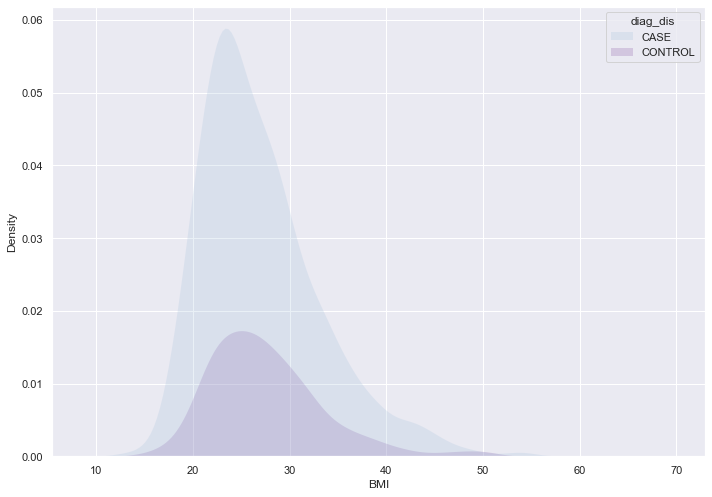

In [7]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.kdeplot(data=ms, x='BMI', hue='diag_dis', shade=True, linewidth=0, palette='BuPu')

<div class="alert alert-success">Can you add sex as a dimension to the above question?</div>


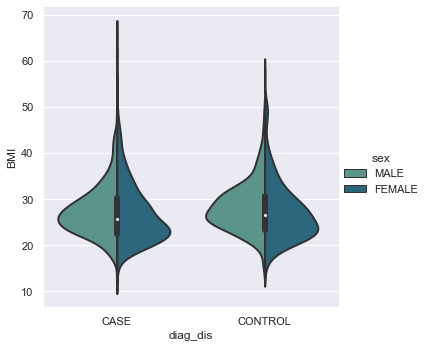

In [8]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.catplot(data=ms, kind="violin", x="diag_dis", y="BMI", hue="sex", split=True, linewidth=2, palette='crest')

<div class="alert alert-success">Does race have effect on the ratio of case vs. control?</div>


In [11]:
races = list(pd.unique(ms['rac_part']))
races.pop(-1)

nan

https://stackoverflow.com/questions/65629001/how-can-i-loop-through-the-title-of-a-plot-matplotlib

<div class="alert alert-success">Pie Charts!</div>


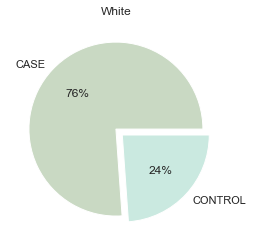

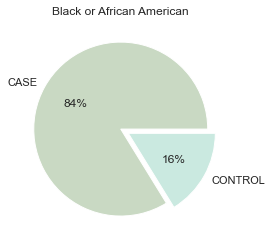

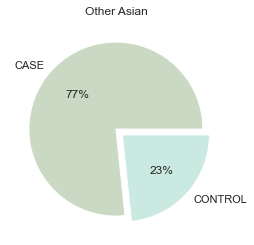

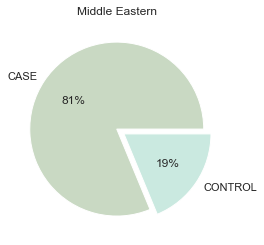

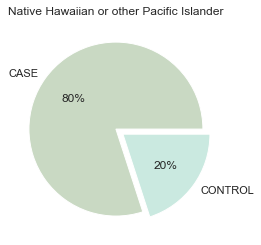

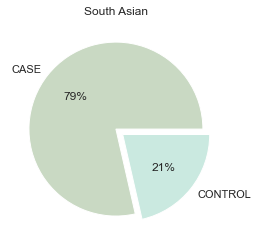

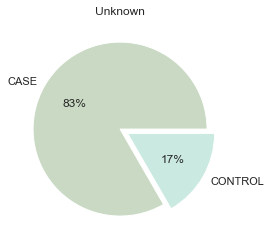

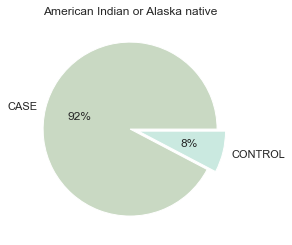

In [13]:
for r in races:
    v = ms.loc[ms['rac_part'] == r, ['rac_part', 'diag_dis']].groupby('diag_dis').diag_dis.count()
    plt.figure(figsize=(5, 4))
    plt.title(f'{r}')
    explode = [0, 0.1]
    plt.pie(v, labels=v.index, autopct='%1.0f%%', colors=['#C9D9C3', '#CAE9E0'], explode = explode)
    plt.show()

<div class="alert alert-success">Scrapped Funky Graph</div>

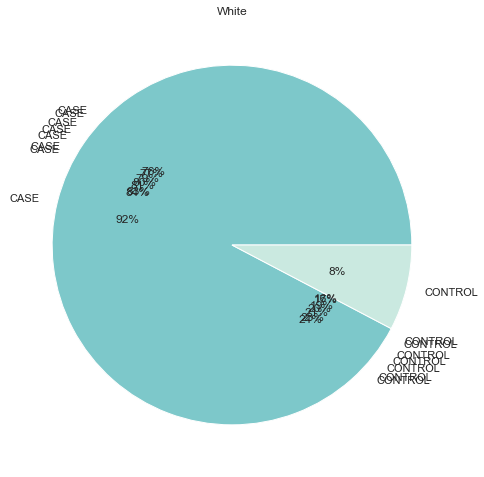

In [14]:
for r in races:
    r = ms.loc[ms['rac_part'] == r, ['rac_part', 'diag_dis']].groupby('diag_dis').diag_dis.count()
    plt.title('White')
    plt.pie(r, labels=r.index, autopct='%1.0f%%', colors=['#7DC8CA', '#CAE9E0'])